<h1 align="center">

<img width="160" height="160" src="https://www.shutterstock.com/image-vector/human-brain-mechanical-equipment-gauges-600w-443927608.jpg" >

</h1>
<h2 align="center">
The Student Performance Prediction

</h2>

<p align="center">
Naive Bayes classifier is a probabilistic machine learning algorithm based on Bayes' theorem, which is used to predict the probability of a particular class given a set of features. It can be used to predict the performance of students based on various factors such as grades, attendance, test scores, and demographic information..
</p> 

##### Import the necessary libraries


In [38]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



#####  Collect a dataset of student performance data 

In [39]:
df = pd.read_csv('student.csv')

In [40]:
print(df.head())
print(df.info())

   student_id  gender   school  grades  attendance  test_scores final_grades
0           1    male  schoolA    0.75        0.90         0.85            A
1           2    male  schoolB    0.62        0.80         0.70            B
2           3  female  schoolA    0.90        0.95         0.95            A
3           4    male  schoolB    0.50        0.70         0.60            C
4           5  female  schoolA    0.80        0.85         0.75            B
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   student_id    20 non-null     int64  
 1   gender        20 non-null     object 
 2   school        20 non-null     object 
 3   grades        20 non-null     float64
 4   attendance    20 non-null     float64
 5   test_scores   20 non-null     float64
 6   final_grades  20 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory us

In [41]:
df.describe()



,student_id,grades,attendance,test_scores
count,20.00000,20.000000,20.00000,20.000000
mean,10.50000,0.708500,0.83500,0.767500
std,5.91608,0.111793,0.09191,0.107941
min,1.00000,0.500000,0.70000,0.600000
25%,5.75000,0.615000,0.78750,0.687500
50%,10.50000,0.700000,0.82500,0.750000
75%,15.25000,0.762500,0.90000,0.850000
max,20.00000,0.900000,0.95000,0.950000


In [42]:
df['gender'].replace(['male', 'female'], [1, 0], inplace=True)
df['school'].replace(['schoolA', 'schoolB'], [1, 0], inplace=True)

In [43]:
df

,student_id,gender,school,grades,attendance,test_scores,final_grades
0,1,1,1,0.75,0.90,0.85,A
1,2,1,0,0.62,0.80,0.70,B
2,3,0,1,0.90,0.95,0.95,A
3,4,1,0,0.50,0.70,0.60,C
4,5,0,1,0.80,0.85,0.75,B
5,6,0,0,0.65,0.95,0.80,B
6,7,1,1,0.70,0.80,0.70,C
7,8,0,0,0.90,0.95,0.95,A
8,9,1,1,0.75,0.80,0.85,B
9,10,0,0,0.60,0.70,0.65,C


##### Data visualization

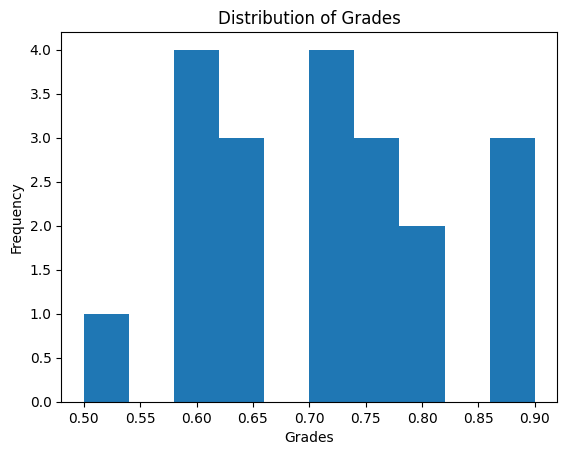

In [44]:



plt.hist(df['grades'])
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.title('Distribution of Grades')
plt.show()

In [45]:
X = df.drop("final_grades", axis=1)
y = df["final_grades"]


##### Split the data into training and testing sets

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)


##### Initialize the classifier:

In [47]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

##### Train the model on the training data:

In [48]:

y_pred = clf.predict(X_test)

 ##### Calculate the accuracy of the model:

In [49]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.4166666666666667


In [50]:
param_grid = {'priors': [0.1, 1, 10], 'var_smoothing': [True, False]}
grid_search = GridSearchCV(clf, param_grid, cv=4)



##### Make predictions on new data:

In [51]:
new_data = pd.read_csv("New_student.csv")
X_new = new_data.drop("final_grades", axis=1)
y_new_pred = clf.predict(X_new)


##### Result grades:

In [52]:
y_new_pred

array(['C', 'C', 'C', 'C', 'B', 'C', 'B', 'A', 'C', 'C'], dtype='<U1')

In [53]:
y_new_pred_proba = clf.predict_proba(X_new)


##### Visualize the results:

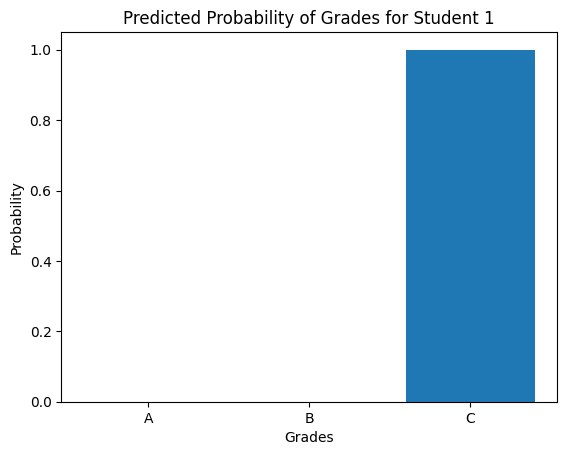

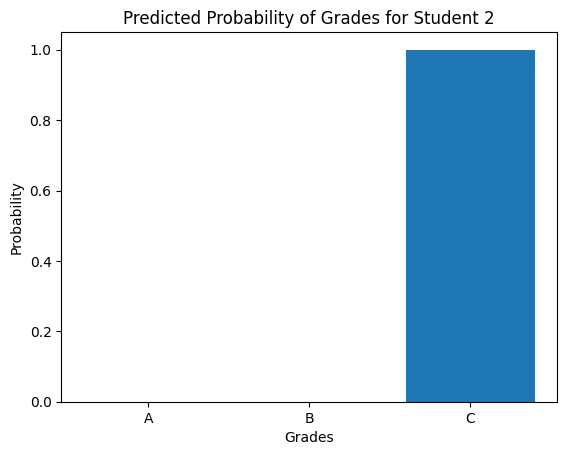

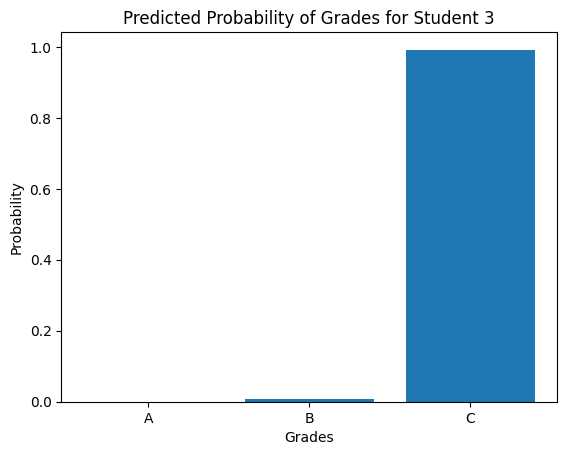

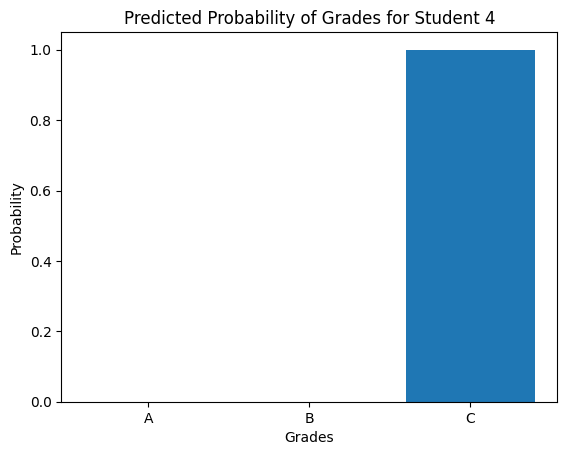

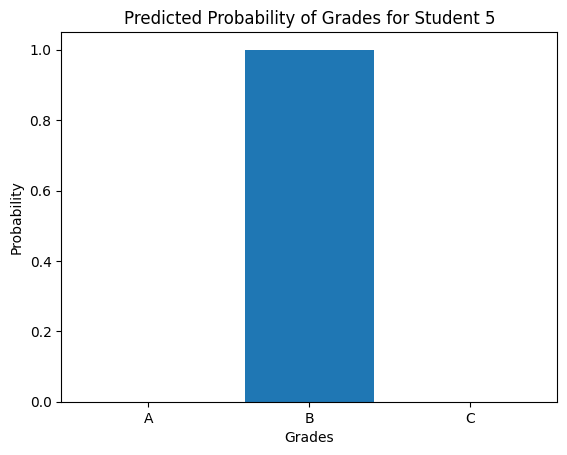

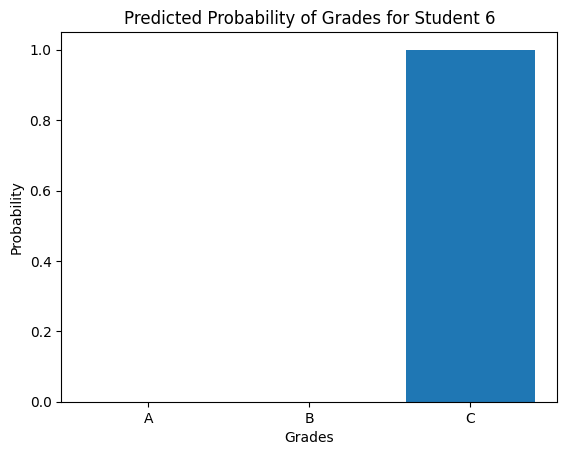

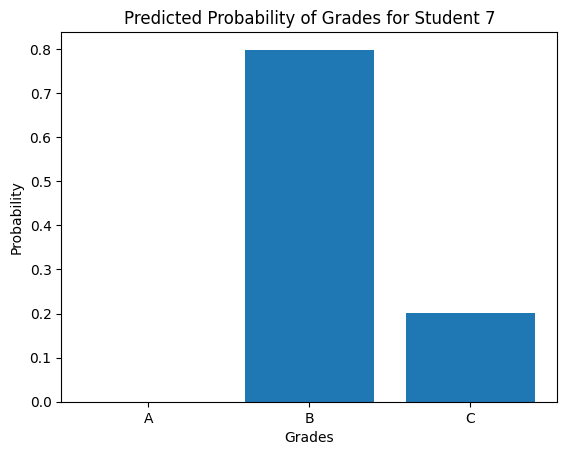

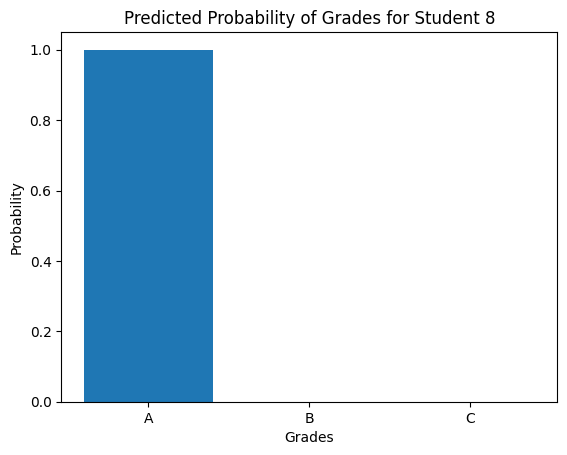

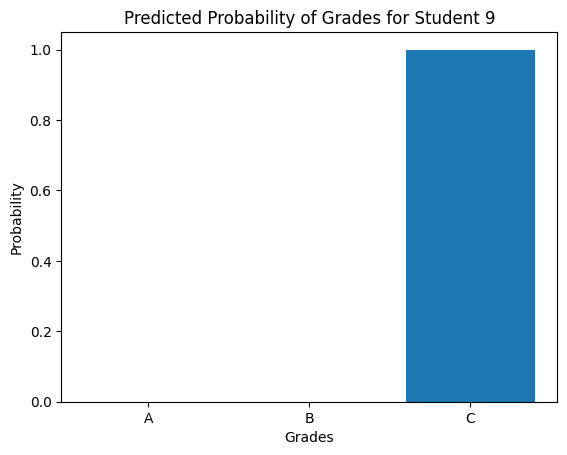

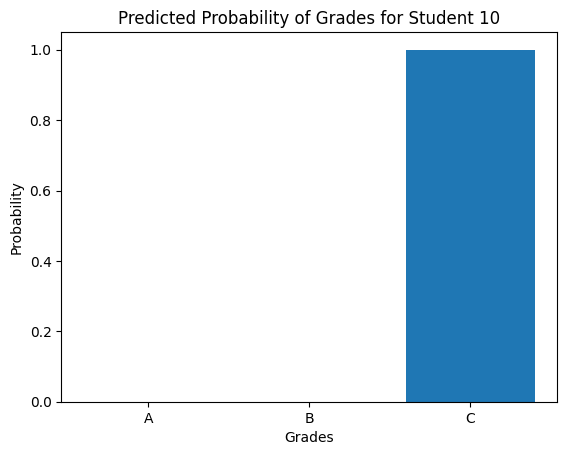

In [54]:
classes = clf.classes_
for i in range(len(X_new)):
    # Get the predicted probabilities for this sample
    probas = y_new_pred_proba[i]

    # Create the bar chart for this sample
    plt.bar(classes, probas)
    plt.xlabel('Grades')
    plt.ylabel('Probability')
    plt.title('Predicted Probability of Grades for Student ' + str(i+1))
    plt.show()

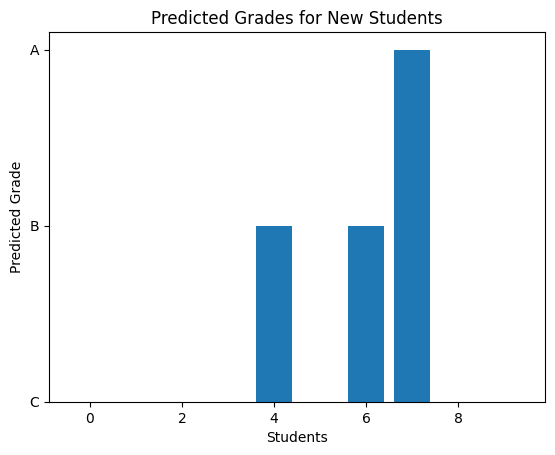

In [55]:
plt.bar(range(len(y_new_pred)), y_new_pred, align='center')
plt.xlabel('Students')
plt.ylabel('Predicted Grade')
plt.title('Predicted Grades for New Students')
plt.show()
